In [1]:
from CPSsenv import CPSsenv
import networkx as nx
from numpy.random import random, choice
import matplotlib.pyplot as plt
import numpy as np

def translate_state(state):
    trans_state = []
    for j in range(3):
        for i in state[j].values():
            trans_state.append(i)
    return trans_state


First toying of the CPSsenv. Consider the following network

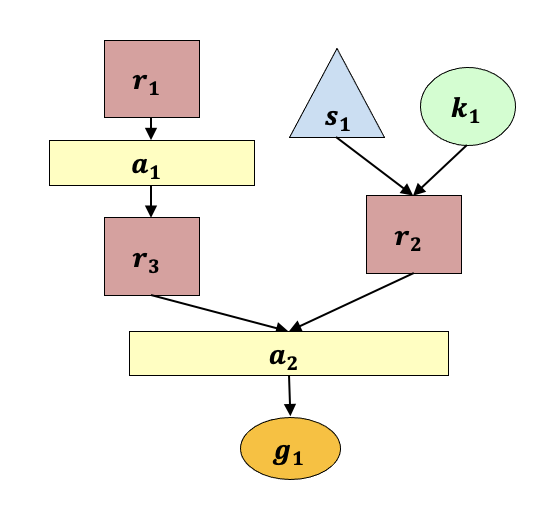

In [ ]:
# Power-point model example
network = nx.DiGraph()
nodes = [('r1',{'type':'Access', 'D': True}), ('r2',{'type':'Access', 'D': False}), ('r3',{'type':'Access', 'D': False}), 
         ('k1',{'type':'Knowledge', 'D': False}), 
         ('g1',{'type':'Goal', 'D': False}),
         ('a1',{'type':'Attack step', 'D': False, 'p': 1}), ('a2',{'type':'Attack step', 'D': False, 'p': 0.7})]
network.add_nodes_from(nodes)

edges = [('r1','a1'), ('a1','r3'), ('k1','r2'), ('r2','a2'), ('r3','a2'), ('a2','g1')]
network.add_edges_from(edges)

In [ ]:
env = CPSsenv(network)
state, available_actions = env.reset()
print('S0:', state)
print('Actions:', available_actions)

In [ ]:
state, available_actions, reward, done, _ = env.step('a1')
print(state)
print(available_actions)
print(reward)
print(done)

In [ ]:
network = nx.DiGraph()
nodes = [('r1',{'type':'Access', 'D': True}), ('r2',{'type':'Access', 'D': True}), ('r3',{'type':'Access', 'D': False}), 
         ('k1',{'type':'Knowledge', 'D': False}), 
         ('g1',{'type':'Goal', 'D': False}),
         ('a1',{'type':'Attack step', 'D': False, 'p': 1}), ('a2',{'type':'Attack step', 'D': False, 'p': 0.7})]
network.add_nodes_from(nodes)

edges = [('r1','a1'), ('a1','r3'), ('k1','r2'), ('r2','a2'), ('r3','a2'), ('a2','g1')]
network.add_edges_from(edges)
env = CPSsenv(network)
state, available_actions = env.reset()
print('S0:', state)
print('Actions:', available_actions)

In [2]:
# Power-point backwards induction example
network = nx.DiGraph()

nodes = [('r1', {'type': 'Access', 'D': True}), ('r2', {'type': 'Access', 'D': False}), 
         ('r3', {'type': 'Access', 'D': False}), ('r4', {'type': 'Access', 'D': False}),
         ('r5', {'type': 'Access', 'D': False}),
         
         ('k1', {'type': 'Knowledge', 'D': False}),
         
         ('s1', {'type': 'Skill', 'D': False}), ('s2', {'type': 'Skill', 'D': False}),
         
         ('g1', {'type': 'Goal', 'D': False, 'R': 1}), ('g2', {'type': 'Goal', 'D': False, 'R': 1}),
         ('g3', {'type': 'Goal', 'D': False, 'R': 1}), ('g4', {'type': 'Goal', 'D': False, 'R': 1}),
         
         ('a1', {'type': 'Attack step', 'D': False, 'p': 1, 'C': 0.1}), ('a2', {'type': 'Attack step', 'D': False, 'p': 1, 'C': 0.1}),
         ('a3', {'type': 'Attack step', 'D': False, 'p': 1, 'C': 0.1}), ('a4', {'type': 'Attack step', 'D': False, 'p': 1, 'C': 0.1}),
         ('a5', {'type': 'Attack step', 'D': False, 'p': 1, 'C': 0.1}), ('a6', {'type': 'Attack step', 'D': False, 'p': 1, 'C': 0.1}),
         ('a7', {'type': 'Attack step', 'D': False, 'p': 1, 'C': 0.1}), ('a8', {'type': 'Attack step', 'D': False, 'p': 1, 'C': 0.1}),
         ('a9', {'type': 'Attack step', 'D': False, 'p': 1, 'C': 0.1}), ('a10', {'type': 'Attack step', 'D': False, 'p': 1, 'C': 0.1}),
         ('a11', {'type': 'Attack step', 'D': False, 'p': 0.2, 'C': 0.1})]

network.add_nodes_from(nodes)

edges = [('r1','a1'), ('r1','a2'), ('r1','a3'), ('r1','a4'), ('r1','a5'),
         ('k1','a1'), 
         ('s1','a2'),
         ('s2','a3'), ('s2','a4'), ('s2','a5'),
         ('a1','r2'),
         ('a2','r2'),
         ('a3','r2'),
         ('a4','r3'),
         ('a5','r4'),
         ('r2','a4'), ('r2','a5'), ('r2','a6'), ('r2','a9'),
         ('r3','a3'), ('r3','a5'), ('r3','a8'), ('r3','a9'),
         ('r4','a3'), ('r4','a4'), ('r4','a9'),
         ('a6','r5'),
         ('r5','a7'), ('r5','a8'), ('r5','a9'),
         ('a7','g1'), 
         ('a8','g2'), 
         ('a9','g3'),
         ('g1','a10'), ('g1','a11'),
         ('a10','g4'),
         ('a11','g2')]

network.add_edges_from(edges)

In [ ]:
env = CPSsenv(network)
state, available_actions = env.reset(random_start = False)
print('S0:', state)
print('Actions:', available_actions)

In [ ]:
state, available_actions, reward, done, _ = env.step('a8')
print(' State', state, '\n A. actions', available_actions, '\n Reward', reward, '\n Done', done)

In [3]:
### Q-Learning
alpha = 0.05         # How fast does the agent learn
gamma = 0.97             # How important are future actions

Episodes = 10000            # Number of episodes

epsilon = 0.45                    # Rate at which random actions will be 
start_e_decaying = 1              # First episode at which decay epsilon
end_e_decaying = Episodes // 2    # Last episode at which decay epsilon
epsilon_decay_value = epsilon / (end_e_decaying - start_e_decaying)     # Amount of decayment of epsilon   

q_table = {}
episodes_rewards = []

env = CPSsenv(network)

for episode in range(Episodes):

    episode_reward = 0
    state, available_actions = env.reset()
    sttate = translate_state(state)
    done = False

    while not done:

        if random() < epsilon or tuple(sttate) not in list(q_table.keys()):
            action = choice(available_actions)
        elif {i:j for i,j in q_table[tuple(sttate)].items() if j in available_actions} == {}:
            action = choice(available_actions)
        else:
            real_dict = {i:j for i,j in q_table[tuple(sttate)].items() if j in available_actions}
            action = max(real_dict, key = real_dict.get)

        new_state, available_actions, reward, done, _ = env.step(action)
        episode_reward += reward
        new_sttate = translate_state(new_state)

        if tuple(sttate) not in list(q_table.keys()):
                    
            q_table[tuple(sttate)] = {}
            q_table[tuple(sttate)][action] = reward
        
        elif tuple(new_sttate) not in list(q_table.keys()) or action not in q_table[tuple(sttate)].keys():
                    
            q_table[tuple(sttate)][action] = reward
            
        else:
            
            max_future_q = max(list(q_table[tuple(new_sttate)].values()))    # Minimum value of the arriving state
            current_q = q_table[tuple(sttate)][action]                   # Value of current state and action
        
            new_q = (1 - alpha) * current_q + alpha * (reward + gamma * max_future_q)               
        
            q_table[tuple(sttate)][action] = new_q     # Update Q Value for current state and action
            
        state = new_state
        sttate = new_sttate
    
    if end_e_decaying >= episode >= start_e_decaying:       # Decay epsilon
            epsilon -= epsilon_decay_value
        
    episodes_rewards.append(episode_reward)

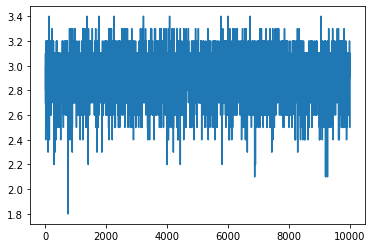

In [4]:
plt.plot(episodes_rewards)

In [5]:
### Testing
episode_reward = 0
state, available_actions = env.reset()
print(state)
sttate = translate_state(state)
done = False

while not done:
    action = max(q_table[tuple(sttate)], key = q_table[tuple(sttate)].get)
    state, available_actions, reward, done, _ = env.step(action)       # Retrieve information
    print(action)
    print(state)
    print(available_actions)
    sttate = translate_state(state)
    episode_reward += reward
print(episode_reward)
    

[{'r1': 1, 'r2': 0, 'r3': 0, 'r4': 0, 'r5': 0}, {'k1': 0}, {'g1': 0, 'g2': 0, 'g3': 0, 'g4': 0}]
a1
[{'r1': 1, 'r2': 1, 'r3': 0, 'r4': 0, 'r5': 0}, {'k1': 0}, {'g1': 0, 'g2': 0, 'g3': 0, 'g4': 0}]
['a2', 'a3', 'a4', 'a5', 'a6', 'a9']
a9
[{'r1': 1, 'r2': 1, 'r3': 0, 'r4': 0, 'r5': 0}, {'k1': 0}, {'g1': 0, 'g2': 0, 'g3': 1, 'g4': 0}]
['a2', 'a3', 'a4', 'a5', 'a6']
a6
[{'r1': 1, 'r2': 1, 'r3': 0, 'r4': 0, 'r5': 1}, {'k1': 0}, {'g1': 0, 'g2': 0, 'g3': 1, 'g4': 0}]
['a2', 'a3', 'a4', 'a5', 'a7', 'a8']
a8
[{'r1': 1, 'r2': 1, 'r3': 0, 'r4': 0, 'r5': 1}, {'k1': 0}, {'g1': 0, 'g2': 1, 'g3': 1, 'g4': 0}]
['a2', 'a3', 'a4', 'a5', 'a7']
a7
[{'r1': 1, 'r2': 1, 'r3': 0, 'r4': 0, 'r5': 1}, {'k1': 0}, {'g1': 1, 'g2': 1, 'g3': 1, 'g4': 0}]
['a2', 'a3', 'a4', 'a5', 'a10', 'a11']
a10
[{'r1': 1, 'r2': 1, 'r3': 0, 'r4': 0, 'r5': 1}, {'k1': 0}, {'g1': 1, 'g2': 1, 'g3': 1, 'g4': 1}]
['a2', 'a3', 'a4', 'a5', 'a11']
3.4
